# Day 6: Cost-Optimization Recommendations

Analyze last month's AWS billing data and identify high-cost services for actionable cost optimization. This workflow uses simple sorting and thresholding, not clustering, to ensure the highest cost services are always detected. All recommendations are generated locally and incur no API cost.

In [3]:
# Install required libraries
!pip install pandas matplotlib --quiet

In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load AWS billing CSV (replace 'aws_billing.csv' with your file path or upload)
df = pd.read_csv('aws_billing.csv')
df.head()

,InvoiceID,AccountID,BillingPeriodStart,BillingPeriodEnd,Service,UsageType,UsageQuantity,Cost
0,inv-001,123456789012,2025-07-01,2025-07-31,AmazonEC2,BoxUsage:t2.medium,720,1200.0
1,inv-002,123456789012,2025-07-01,2025-07-31,AmazonS3,TimedStorage-ByteHrs,500000,300.0
2,inv-003,123456789012,2025-07-01,2025-07-31,AmazonRDS,InstanceUsage:db.m5.large,720,800.0
3,inv-004,123456789012,2025-07-01,2025-07-31,AWSLambda,Requests,1000000,50.0
4,inv-005,123456789012,2025-07-01,2025-07-31,AmazonDynamoDB,WriteCapacityUnit,200000,200.0


In [6]:
# Summarize costs by service
service_costs = df.groupby('Service')['Cost'].sum().reset_index()
service_costs = service_costs.sort_values('Cost', ascending=False)
service_costs

,Service,Cost
4,AmazonEC2,1200.0
7,AmazonRDS,800.0
8,AmazonRedshift,600.0
3,AmazonEBS,400.0
6,AmazonElastiCache,350.0
9,AmazonS3,300.0
5,AmazonECS,250.0
2,AmazonDynamoDB,200.0
1,AmazonCloudFront,150.0
0,AWSLambda,50.0


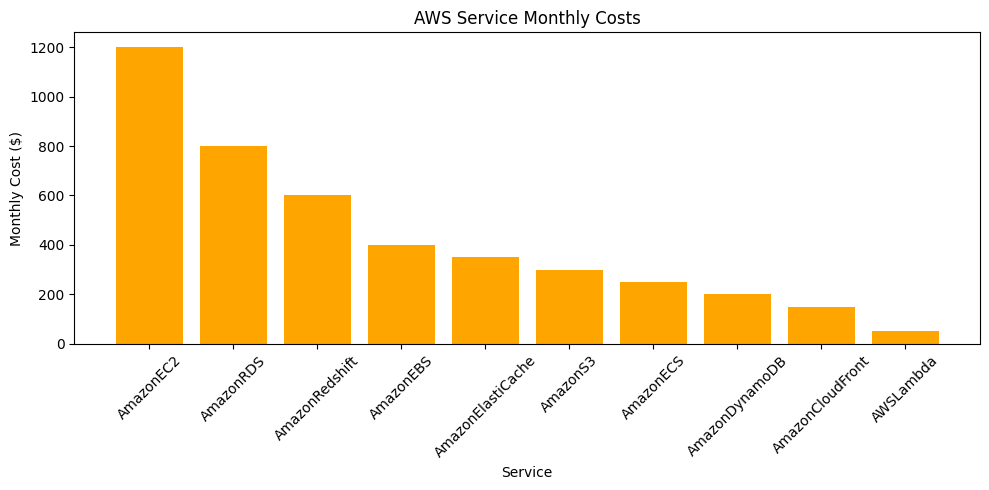

In [7]:
# Visualize top cost-incurring services
plt.figure(figsize=(10,5))
plt.bar(service_costs['Service'], service_costs['Cost'], color='orange')
plt.title('AWS Service Monthly Costs')
plt.xlabel('Service')
plt.ylabel('Monthly Cost ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Select top N highest-cost services for optimization
N = 5  # You can adjust N as needed
top_services = service_costs.head(N)
print('Top cost-incurring AWS services for optimization:')
for _, row in top_services.iterrows():
    print(f"- {row['Service']}: ${row['Cost']}")

# --- Original prompt ---
original_prompt = (
    "Given these top AWS services and their monthly spend, suggest concrete cost optimization actions. "
    "For each service, recommend rightsizing, AWS savings plans, and any cheaper alternatives (including open-source or multi-cloud options):\n\n"
)
for _, row in top_services.iterrows():
    original_prompt += f"- {row['Service']}: ${row['Cost']}\n"

# --- Improved prompt ---
improved_prompt = (
    "You are an expert AWS cloud cost optimization consultant. "
    "Given the following top AWS services and their monthly spend, provide a detailed, actionable cost optimization plan for each service. "
    "For each service, include:\n"
    "1. Rightsizing recommendations (instance types, storage, scaling)\n"
    "2. AWS-native savings options (Savings Plans, Reserved Instances, Spot Instances, etc.)\n"
    "3. Cheaper alternatives (open-source, multi-cloud, or architectural changes)\n"
    "4. Specific steps to implement each recommendation\n"
    "5. Estimated potential savings (if possible)\n"
    "6. Any risks or trade-offs to consider\n\n"
    "Format your response as:\n"
    "## [Service Name]\n"
    "- **Monthly Spend:** $[Cost]\n"
    "- **Rightsizing:** ...\n"
    "- **Savings Plans/Reserved Instances:** ...\n"
    "- **Cheaper Alternatives:** ...\n"
    "- **Implementation Steps:** ...\n"
    "- **Estimated Savings:** ...\n"
    "- **Risks/Trade-offs:** ...\n\n"
    "Here are the services:\n"
)
for _, row in top_services.iterrows():
    improved_prompt += f"- {row['Service']}: ${row['Cost']}\n"

import requests

# --- Run Ollama with original prompt ---
try:
    response = requests.post(
        "http://localhost:11434/api/generate",
        json={
            "model": "llama2",
            "prompt": original_prompt,
            "stream": False
        }
    )
    if response.status_code == 200 and 'response' in response.json():
        recommendations = response.json()['response']
        print("\nOllama LLM Recommendations (Original Prompt):\n")
        print(recommendations)
        with open("aws_cost_optimization_recommendations.md", "w") as f:
            f.write(recommendations)
        print("\nRecommendations saved to aws_cost_optimization_recommendations.md")
    else:
        print("Ollama API error or unexpected response:", response.text)
except Exception as e:
    print("Error calling Ollama API (original prompt):", e)

# --- Run Ollama with improved prompt ---
try:
    response = requests.post(
        "http://localhost:11434/api/generate",
        json={
            "model": "llama2",
            "prompt": improved_prompt,
            "stream": False
        }
    )
    if response.status_code == 200 and 'response' in response.json():
        recommendations = response.json()['response']
        print("\nOllama LLM Recommendations (Improved Prompt):\n")
        print(recommendations)
        with open("aws_cost_optimization_recommendations_improved.md", "w") as f:
            f.write(recommendations)
        print("\nRecommendations saved to aws_cost_optimization_recommendations_improved.md")
    else:
        print("Ollama API error or unexpected response:", response.text)
except Exception as e:
    print("Error calling Ollama API (improved prompt):", e)

print("\nCompare the outputs in aws_cost_optimization_recommendations.md and aws_cost_optimization_recommendations_improved.md for prompt effectiveness.")

Top cost-incurring AWS services for optimization:
- AmazonEC2: $1200.0
- AmazonRDS: $800.0
- AmazonRedshift: $600.0
- AmazonEBS: $400.0
- AmazonElastiCache: $350.0

Ollama LLM Recommendations (Original Prompt):

Based on the provided information, here are some concrete cost optimization actions for each AWS service:

1. AmazonEC2:
	* Rightsizing: Review your EC2 instance sizes and reduce the number of instances running at any given time. Consider using spot instances or reserved instances to save even more money.
	* AWS Savings Plans: Use an AWS Savings Plan to purchase upfront capacity reservations for a 3-year term. This can help you save up to 15% on your EC2 usage.
	* Cheaper alternatives: Consider using open-source virtualization platforms like KVM or OpenStack, which can provide similar functionality to EC2 without the hefty price tag. Multi-cloud options like AWS Outposts or Azure Stack can also provide on-premises infrastructure capabilities without the need for EC2 instances.
